In [1]:
#Importación de paquetes a utilizar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp
sp.init_printing(use_unicode = True)
from scipy import interpolate

#Punto 1

##a)

In [2]:
#Definimos la función lagrange, pesando en el siguiente punto lo adaptamos para que retorne la función
#con los reemplazos propios del método de adams
def lagrange(N,adams=False,*args):
    total = 0
    t = sp.var('t')
    if (adams):
        h = sp.var('h')
    for i in range(0,N,1):
        ts = 1
        for j in range(0,N,1):
            if (i != j):
                if (adams and i != 0):
                    ti = sp.var('t0') - i*h
                else:
                    ti = sp.var('t%d'%i)
                if (adams and j != 0):
                    tj = sp.var('t0') - j*h
                else:
                    tj = sp.var('t%d'%j)
                ts *= ((t - tj)/(ti - tj))
        total += sp.var('f%d'%i)*ts
    return (total)

In [3]:
lagrange(1)

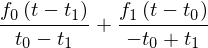

In [4]:
lagrange(2)

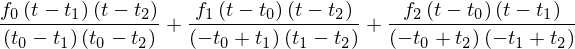

In [5]:
lagrange(3)

In [6]:
def adams(N):
    return (sp.simplify(sp.integrate(lagrange(N,adams=True),(t,t0,t0+h))))

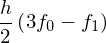

In [7]:
adams(2)

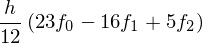

In [8]:
adams(3)

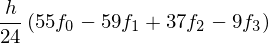

In [9]:
adams(4)

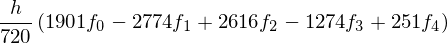

In [10]:
adams(5)

#Punto 2

Usando la guia vista de clase sobre PDE y analizando el problema de Poisson en 2D y el metodo de relajación se realizó este punto.

En primer lugar se definió la ecuación a resolver:
$\nabla^2U = \frac{d^2U}{dx^2} + \frac{d^2U}{dy^2} + \frac{d^2U}{dz^2} = 4\pi G\rho$.

Entonces se tiene claro que son dos cubos, uno con un lado de 3Km y otro de 270m, se tiene la densidad del cubo con un valor de 400$\frac{Kg}{m^3}$, dejo todo en MSI

In [11]:
#Se definen las constantes
LCubo = 3.*1000
lCubo = 270.
densidad = 400.
G = 6.67**(-11)
#Defino el espacio
xmin = -LCubo/2
xmax = LCubo/2
ymin = -LCubo/2
ymax = LCubo/2
zmin = -LCubo/2
zman = LCubo/2
#Para dividir el espacio de modo tal que quede una masa en el centro, se tiene que dividir de modo tal el espacio tenga un numero de diviciones impar
#Esto se ve en el cuadernillo guia, la diferencia es que en la guía no se define un limite para el espacio, aquí si
#entonces se procede a dividir el espacio de modo tal que quede una cantidad impar y equidistante entre unidades
Espacios = (xmax*2)/30 +1 #uno en el centro y 50 para la izquierda y 50 a la derecha
xcoords = np.linspace(xmin,xmax,Espacios)
ycoords = np.linspace(ymin,ymax,Espacios)
#Para definir los cubos, primero se deben definir masas puntuales, en el segundo inciso
#se dice que se debe segmentar el cubo pequeño en 9³ cubos.
#Como el cubo pequeño mide 270 de lado y el lado se divide en 9 cubos, entonces cada cubo que compone al pequeño tiene 30 de lado
Mpuntual = 30
#Defino el cubo de 3Km con los espacios que cree como en la guia
CuboGrande = np.zeros((Espacios,Espacios,Espacios))
#Le damos masa y las demas constantes a los cubos que conforman el cubo pequeño, para esto en el eje X y Y, entonces es restarle a los 50 espacios 4 de un lado y cuatro del otro 4
#Como en el ejemplo de la tarea se multiplican las uninades por ellas mismas
CuboGrande[46:-46,46:-46,46:-46] = densidad
#Luego le doy propiedades a todos los cubitos
CuboGrande = CuboGrande*4.*np.pi*G*Mpuntual**2
#Se define el numero de iteraciones
NumIter = 2000

In [12]:
#Se definen los arreglos de coordenadas para definir el r de la ecuacion del potencial
x,y,z = np.meshgrid(xcoords, ycoords, xcoords)
#Como voy a cambiar X, Y y Z por un vector r donde no se anule la discontinuidad en 0, debo definir un centro y el el cubo del que de hablo antes
#Se define el potencial, le sume una pequeña suma a un eje para que no se indeterminara en 0 (Le sume esto por que no recuerdo la constante que se dijo en clase)
U = (G*densidad*Mpuntual**3/((-1)*(np.sqrt((x+0.1)**2 + y**2 +z**2))))
#Se llama al metodo de relajacion exactamente como en la guia
for __ in range(NumIter):
    U = (np.roll(U, 1,axis=0)+ np.roll(U,-1,axis=0)+ np.roll(U, 1,axis=1)+np.roll(U,-1,axis=1)+np.roll(U, 1,axis=2)+np.roll(U,-1,axis=2)-CuboGrande)/6.0 
    U[0] = 0.
    U[-1] = 0.
    U[:,0,:] = 0.
    U[:,-1,:] = 0.
    U[:,:,0] = 0.
    U[:,:,-1] = 0.

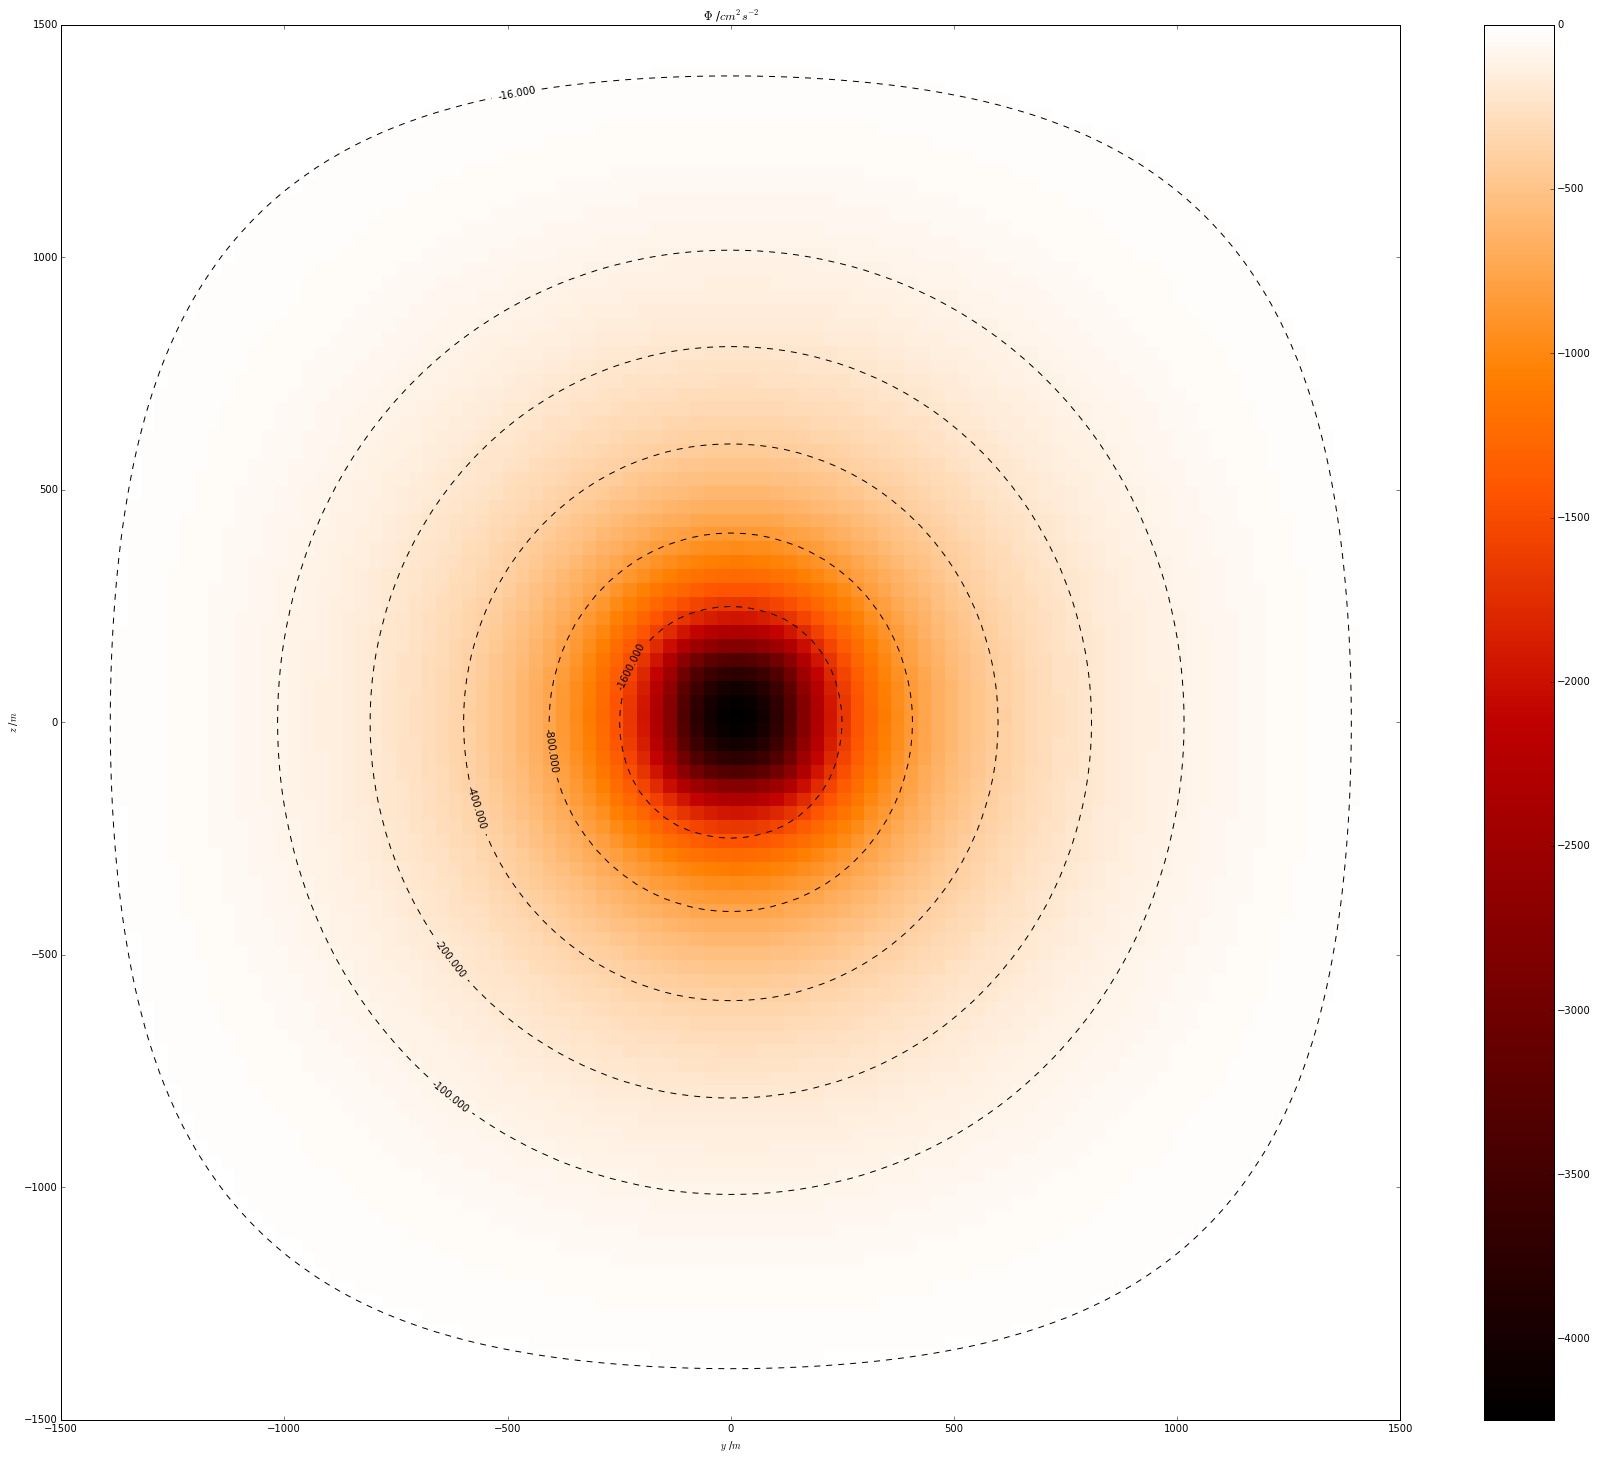

In [14]:
fig = plt.figure(figsize=(30,25))
#http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
ax = fig.add_subplot(111)
#Se debe tener en cuenta que el cubo de la mitad queda en Espacios/2
fig.colorbar(ax.pcolor(xcoords, ycoords, 80000*U[Espacios/2], cmap='gist_heat'))
plt.clabel(ax.contour(xcoords, ycoords, 80000*U[Espacios/2], levels=[-16, 40, -100,-200,-400,-800,-1600],colors = 'k'))
plt.title('$\Phi$ /$cm^{2}s^{-2}$')
plt.xlabel('$y$ /$m$')
plt.ylabel('$z$ /$m$')
plt.show()

##b)

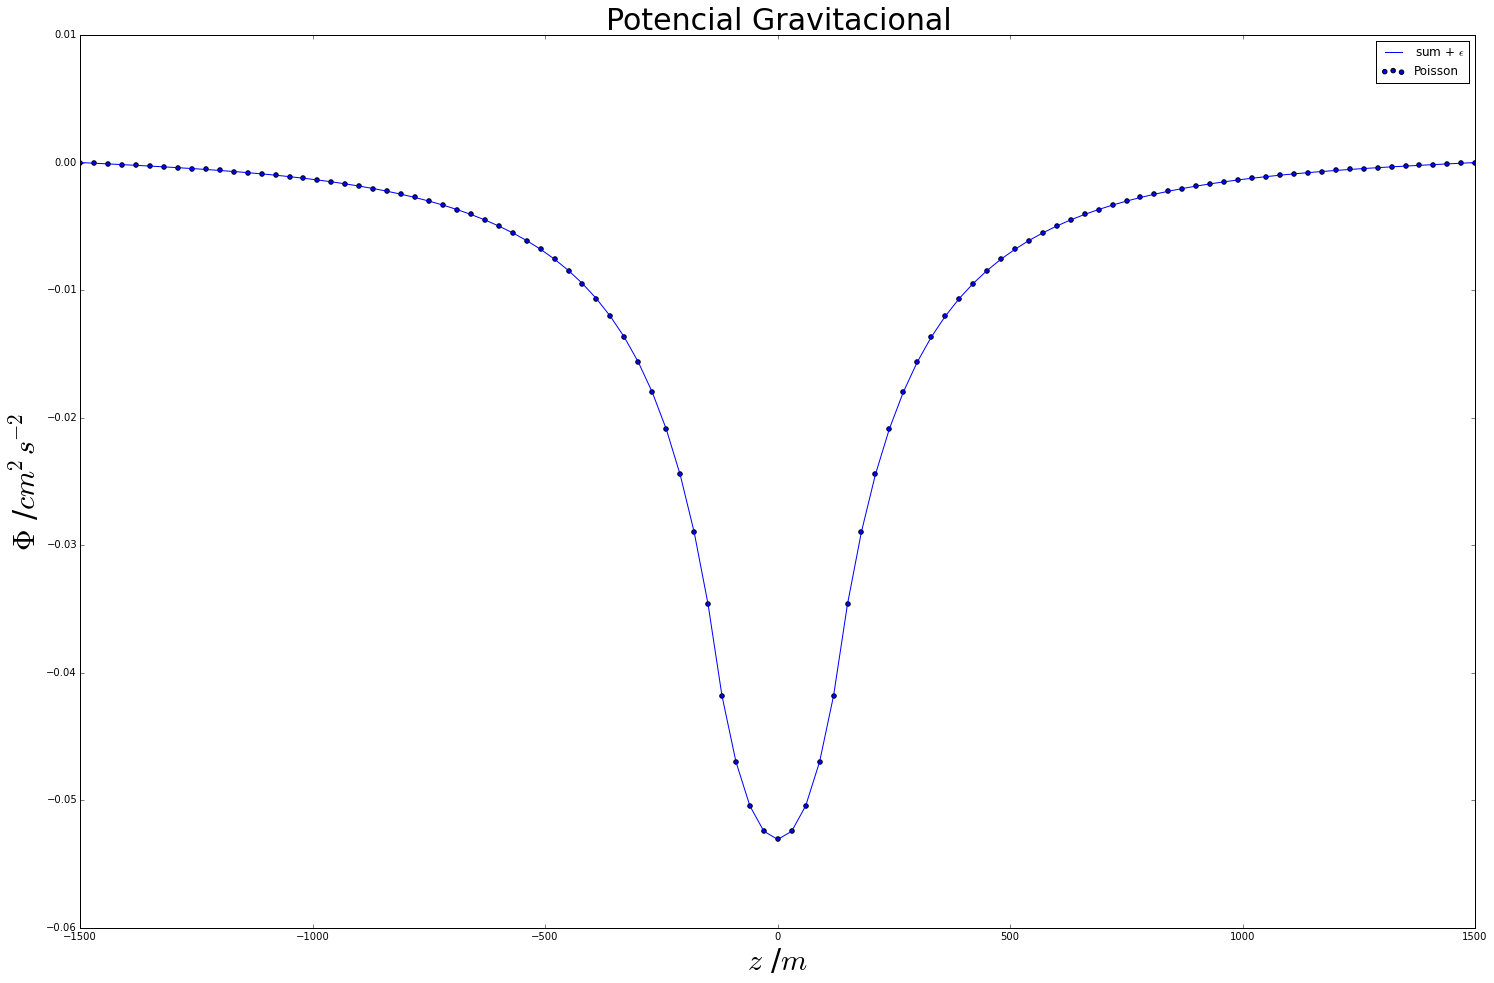

In [15]:
#Simplemente es graficar el potencial en los puntos medios contra el array de xcoords
plt.figure(figsize=(25,16))
ax = fig.add_subplot(111)
plt.plot(xcoords,U[Espacios/2,Espacios/2],label='sum + $\epsilon$',mfc='None')
plt.title('Potencial Gravitacional',fontsize=30)
plt.scatter(xcoords,U[Espacios/2,Espacios/2],label='Poisson')
plt.xlim(-1500,1500)
plt.legend()
plt.ylabel('$\Phi$ /$cm^{2}s^{-2}$',fontsize=30)
plt.xlabel('$z$ /$m$',fontsize=30)
plt.show(fig)

##c)

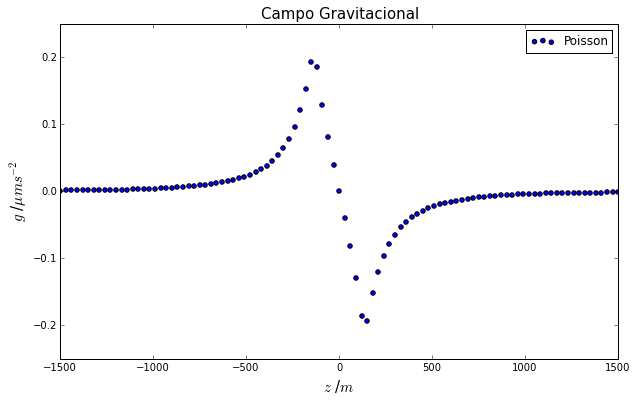

In [33]:
#Defino la derivada como la resta de un elemento con el anterior y dividido por la distancia entre puntos 
dx = (np.roll(U[Espacios/2,Espacios/2],1)-np.roll(U[Espacios/2,Espacios/2],-1))/2*Mpuntual
plt.figure(figsize=(10,6))
plt.title('Campo Gravitacional',fontsize=15)
plt.xlabel('$z$ /$m$',fontsize=15)
plt.ylabel('$g$ /$\mu ms^{-2}$',fontsize=15)
plt.xlim(-1500,1500)
plt.ylim(-0.25, 0.25)
plt.scatter(xcoords,dx,label='Poisson')
plt.legend()
plt.show(fig)

##d)

In [24]:
#Se generan los datos que seran analizados con runge kutta, estos se extraen interpolando la derivada anterior
func = interpolate.interp1d(dx[1:-1],xcoords[1:-1], kind = 'cubic')

In [25]:
#Se define runge kutta como el la tarea anterior
#Primero la funcion
def f(Y):
    return (np.array([Y[1], func(Y[0])]))

In [26]:
def runge_kutta_orden4(dt,Y):
    K1 = f(Y)
    K2 = f(Y + dt*(1./2.*K1))
    K3 = f(Y + dt*(1./2.*K2))
    K4 = f(Y + dt*K3)
    #Asignamos los nuevos valores encontrados al vector inicial.
    Y+= dt * (1/6.*K1 + 1/3. * K2 + 1/3.*K3 + 1/6.*K4)
    return(Y)

In [27]:
#Definimos una función que llama varias veces el método de Runge-Kutta para efectuar la simulación.
def simulacion(Y,numIter=20000,tmax=10000,*args):
    dt = tmax/numIter
    history=np.array([Y]) #Este array contendrá la información luego de cada iteración con el fin de poder graficar.
    for iters in range(numIter):#Se ejecuta el método Runge-Kutta  durante la cantidad de iteraciones propuestas
        history=np.append(history,[runge_kutta_orden4(dt,history[-1])],axis=0)
    tiempoSimulacion = np.linspace(0,tmax,numIter)
    return (history,numIter)

In [ ]:
posicion0 = 500.
Y = np.array([posicion0,0.])
history,tiempo = simulacion(Y)